# 4. Análisis Exploratorio Univariado

## Objetivo
Entender cada variable por separado, identificando patrones, distribuciones y posibles anomalías.

---

## 4.0 Configuración e Importaciones

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 10

# Paleta de colores
COLORS = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#3B1F2B']
sns.set_palette(COLORS)

print("Librerías cargadas correctamente")

Librerías cargadas correctamente


In [3]:
# Cargar dataset limpio
DATA_PATH = Path('../data/processed')
df = pd.read_csv(DATA_PATH / 'nacimientos_2009_2022_limpio.csv')

print(f"Dataset cargado: {len(df):,} registros")
print(f"Variables: {len(df.columns)}")

Dataset cargado: 5,195,195 registros
Variables: 36


---
# PARTE A: VARIABLES NUMÉRICAS

Analizaremos las tres variables numéricas principales:
1. **Edadm** - Edad de la madre
2. **Peso_gramos** - Peso al nacer
3. **Tohite** - Total de hijos tenidos

In [4]:
def analisis_univariado_numerico(df, variable, titulo, unidad='', color='#2E86AB'):
    """
    Realiza análisis univariado completo para una variable numérica.
    Incluye: estadísticas descriptivas, histograma, boxplot y análisis de distribución.
    """
    datos = df[variable].dropna()
    
    # Estadísticas descriptivas
    print("═" * 60)
    print(f"ANÁLISIS UNIVARIADO: {titulo.upper()}")
    print("═" * 60)
    
    print(f"\n📊 ESTADÍSTICAS DESCRIPTIVAS")
    print("-" * 40)
    print(f"   N (válidos):     {len(datos):>15,}")
    print(f"   N (faltantes):   {df[variable].isna().sum():>15,}")
    print(f"   Media:           {datos.mean():>15.2f} {unidad}")
    print(f"   Mediana:         {datos.median():>15.2f} {unidad}")
    print(f"   Moda:            {datos.mode().iloc[0]:>15.2f} {unidad}")
    print(f"   Desv. estándar:  {datos.std():>15.2f} {unidad}")
    print(f"   Varianza:        {datos.var():>15.2f}")
    print(f"   Mínimo:          {datos.min():>15.2f} {unidad}")
    print(f"   Máximo:          {datos.max():>15.2f} {unidad}")
    print(f"   Rango:           {datos.max() - datos.min():>15.2f} {unidad}")
    print(f"   Q1 (25%):        {datos.quantile(0.25):>15.2f} {unidad}")
    print(f"   Q3 (75%):        {datos.quantile(0.75):>15.2f} {unidad}")
    print(f"   IQR:             {datos.quantile(0.75) - datos.quantile(0.25):>15.2f} {unidad}")
    
    # Medidas de forma
    asimetria = stats.skew(datos)
    curtosis = stats.kurtosis(datos)
    
    print(f"\n📐 MEDIDAS DE FORMA")
    print("-" * 40)
    print(f"   Asimetría (skewness): {asimetria:>10.3f}")
    print(f"   Curtosis (kurtosis):  {curtosis:>10.3f}")
    
    # Interpretación de asimetría
    if asimetria > 0.5:
        tipo_asimetria = "Asimétrica positiva (cola derecha)"
    elif asimetria < -0.5:
        tipo_asimetria = "Asimétrica negativa (cola izquierda)"
    else:
        tipo_asimetria = "Aproximadamente simétrica"
    
    print(f"   → Interpretación: {tipo_asimetria}")
    
    # Visualizaciones
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    # Histograma con KDE
    axes[0].hist(datos, bins=50, density=True, alpha=0.7, color=color, edgecolor='white')
    datos.plot(kind='kde', ax=axes[0], color='darkred', linewidth=2)
    axes[0].axvline(datos.mean(), color='red', linestyle='--', label=f'Media: {datos.mean():.1f}')
    axes[0].axvline(datos.median(), color='green', linestyle='--', label=f'Mediana: {datos.median():.1f}')
    axes[0].set_xlabel(f'{titulo} ({unidad})')
    axes[0].set_ylabel('Densidad')
    axes[0].set_title(f'Distribución de {titulo}')
    axes[0].legend(fontsize=8)
    
    # Boxplot
    bp = axes[1].boxplot(datos, vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor(color)
    bp['boxes'][0].set_alpha(0.7)
    axes[1].set_ylabel(f'{titulo} ({unidad})')
    axes[1].set_title(f'Boxplot de {titulo}')
    axes[1].set_xticklabels([titulo])
    
    # QQ-Plot para normalidad
    stats.probplot(datos.sample(min(10000, len(datos))), dist="norm", plot=axes[2])
    axes[2].set_title('Q-Q Plot (muestra)')
    axes[2].get_lines()[0].set_color(color)
    axes[2].get_lines()[0].set_alpha(0.5)
    
    plt.tight_layout()
    plt.show()
    
    return {
        'media': datos.mean(),
        'mediana': datos.median(),
        'desv_std': datos.std(),
        'asimetria': asimetria,
        'curtosis': curtosis
    }

---
## 4.1 Edad de la Madre (Edadm)

════════════════════════════════════════════════════════════
ANÁLISIS UNIVARIADO: EDAD DE LA MADRE
════════════════════════════════════════════════════════════

📊 ESTADÍSTICAS DESCRIPTIVAS
----------------------------------------
   N (válidos):           5,181,724
   N (faltantes):            13,471
   Media:                     25.63 años
   Mediana:                   25.00 años
   Moda:                      21.00 años
   Desv. estándar:             6.59 años
   Varianza:                  43.48
   Mínimo:                    10.00 años
   Máximo:                    55.00 años
   Rango:                     45.00 años
   Q1 (25%):                  20.00 años
   Q3 (75%):                  30.00 años
   IQR:                       10.00 años

📐 MEDIDAS DE FORMA
----------------------------------------
   Asimetría (skewness):      0.562
   Curtosis (kurtosis):      -0.304
   → Interpretación: Asimétrica positiva (cola derecha)


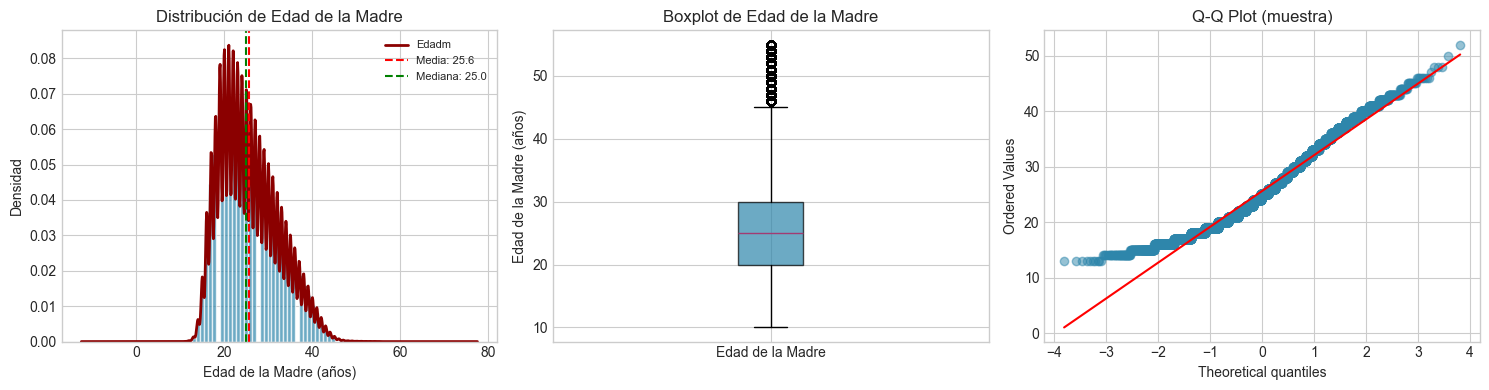

In [5]:
stats_edadm = analisis_univariado_numerico(df, 'Edadm', 'Edad de la Madre', 'años', '#2E86AB')


📊 DISTRIBUCIÓN POR GRUPOS DE EDAD
--------------------------------------------------
   Adulta joven (20-34)       3,584,033 ( 69.2%)
   Adolescente (10-19)        1,002,045 ( 19.3%)
   Adulta (35-55)               595,646 ( 11.5%)


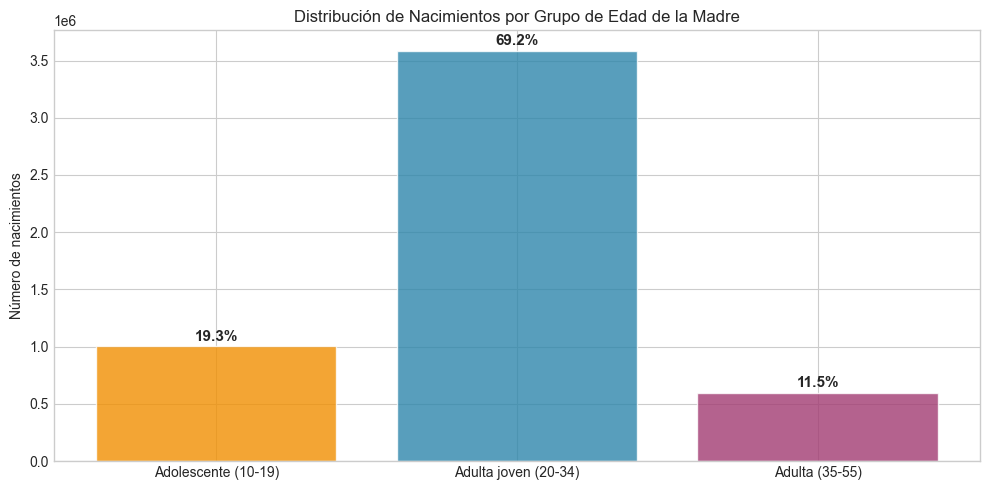

In [6]:
# Análisis adicional: distribución por grupos de edad
print("\n📊 DISTRIBUCIÓN POR GRUPOS DE EDAD")
print("-" * 50)

grupo_edad = df['Grupo_edad_madre'].value_counts()
grupo_edad_pct = df['Grupo_edad_madre'].value_counts(normalize=True) * 100

for grupo in grupo_edad.index:
    print(f"   {grupo:<25} {grupo_edad[grupo]:>10,} ({grupo_edad_pct[grupo]:>5.1f}%)")

# Visualización
fig, ax = plt.subplots(figsize=(10, 5))
orden = ['Adolescente (10-19)', 'Adulta joven (20-34)', 'Adulta (35-55)']
colors_grupo = ['#F18F01', '#2E86AB', '#A23B72']

bars = ax.bar(orden, [grupo_edad[g] for g in orden], color=colors_grupo, edgecolor='white', alpha=0.8)
ax.set_ylabel('Número de nacimientos')
ax.set_title('Distribución de Nacimientos por Grupo de Edad de la Madre')

# Añadir etiquetas
for bar, pct in zip(bars, [grupo_edad_pct[g] for g in orden]):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50000, 
            f'{pct:.1f}%', ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# Insight sobre edad de la madre
print("\n💡 INSIGHTS - EDAD DE LA MADRE")
print("═" * 60)
print(f"""
1. La edad promedio de las madres es {df['Edadm'].mean():.1f} años.

2. EMBARAZO ADOLESCENTE: {df['Madre_adolescente'].mean()*100:.1f}% de los nacimientos
   corresponden a madres menores de 20 años. Esto es un indicador
   importante de salud pública.

3. MADRES DE EDAD AVANZADA: {df['Madre_35_mas'].mean()*100:.1f}% de los nacimientos corresponden
   a madres de 35 años o más.

4. La distribución presenta asimetría positiva ({stats_edadm['asimetria']:.2f}),
   indicando una cola hacia edades mayores.

5. El grupo más frecuente es "Adulta joven" (20-34 años) con ~69% 
   de los nacimientos.
""")


💡 INSIGHTS - EDAD DE LA MADRE
════════════════════════════════════════════════════════════

1. La edad promedio de las madres es 25.6 años.

2. EMBARAZO ADOLESCENTE: 19.3% de los nacimientos
   corresponden a madres menores de 20 años. Esto es un indicador
   importante de salud pública.

3. MADRES AÑOSAS: 11.5% de los nacimientos corresponden
   a madres de 35 años o más.

4. La distribución presenta asimetría positiva (0.56),
   indicando una cola hacia edades mayores.

5. El grupo más frecuente es "Adulta joven" (20-34 años) con ~69% 
   de los nacimientos.



---
## 4.2 Peso al Nacer (Peso_gramos)

════════════════════════════════════════════════════════════
ANÁLISIS UNIVARIADO: PESO AL NACER
════════════════════════════════════════════════════════════

📊 ESTADÍSTICAS DESCRIPTIVAS
----------------------------------------
   N (válidos):           5,187,206
   N (faltantes):             7,989
   Media:                   3055.37 g
   Mediana:                 3090.10 g
   Moda:                    3175.14 g
   Desv. estándar:           494.71 g
   Varianza:              244738.75
   Mínimo:                   510.29 g
   Máximo:                  5726.60 g
   Rango:                   5216.31 g
   Q1 (25%):                2721.55 g
   Q3 (75%):                3345.24 g
   IQR:                      623.69 g

📐 MEDIDAS DE FORMA
----------------------------------------
   Asimetría (skewness):     -0.231
   Curtosis (kurtosis):       1.449
   → Interpretación: Aproximadamente simétrica


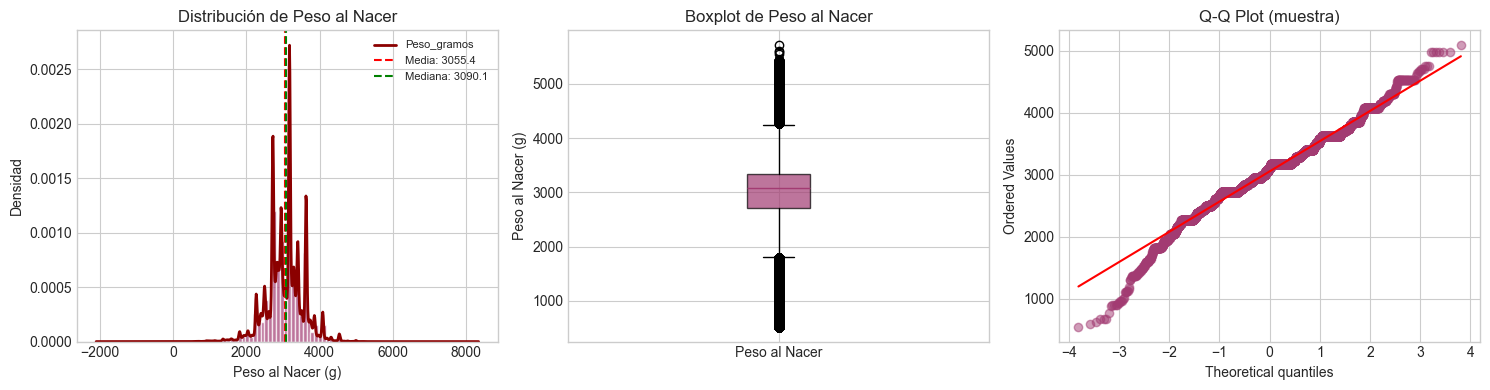

In [8]:
stats_peso = analisis_univariado_numerico(df, 'Peso_gramos', 'Peso al Nacer', 'g', '#A23B72')


📊 DISTRIBUCIÓN POR CATEGORÍA DE PESO (OMS)
------------------------------------------------------------
   Muy bajo peso (<1500g)             31,987 ( 0.62%)
   Bajo peso (1500-2499g)            602,290 (11.61%)
   Normal (2500-3999g)             4,394,837 (84.72%)
   Macrosomía (≥4000g)               158,092 ( 3.05%)


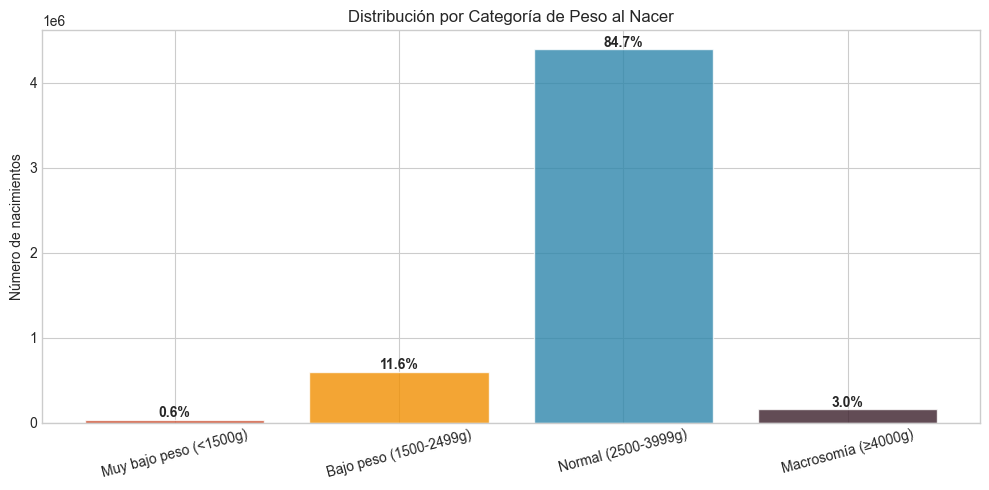

In [9]:
# Análisis adicional: distribución por categorías de peso
print("\n📊 DISTRIBUCIÓN POR CATEGORÍA DE PESO (OMS)")
print("-" * 60)

cat_peso = df['Categoria_peso'].value_counts()
cat_peso_pct = df['Categoria_peso'].value_counts(normalize=True) * 100

orden_peso = ['Muy bajo peso (<1500g)', 'Bajo peso (1500-2499g)', 
              'Normal (2500-3999g)', 'Macrosomía (≥4000g)']

for cat in orden_peso:
    if cat in cat_peso.index:
        print(f"   {cat:<30} {cat_peso[cat]:>10,} ({cat_peso_pct[cat]:>5.2f}%)")

# Visualización
fig, ax = plt.subplots(figsize=(10, 5))
colors_peso = ['#C73E1D', '#F18F01', '#2E86AB', '#3B1F2B']

valores = [cat_peso.get(c, 0) for c in orden_peso]
bars = ax.bar(orden_peso, valores, color=colors_peso, edgecolor='white', alpha=0.8)
ax.set_ylabel('Número de nacimientos')
ax.set_title('Distribución por Categoría de Peso al Nacer')
ax.tick_params(axis='x', rotation=15)

# Añadir etiquetas
for bar, cat in zip(bars, orden_peso):
    if cat in cat_peso_pct.index:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 30000, 
                f'{cat_peso_pct[cat]:.1f}%', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [10]:
# Insight sobre peso al nacer
bajo_peso_total = df['Bajo_peso'].mean() * 100

print("\n💡 INSIGHTS - PESO AL NACER")
print("═" * 60)
print(f"""
1. El peso promedio al nacer es {df['Peso_gramos'].mean():.0f} gramos
   (aproximadamente {df['Peso_gramos'].mean()/453.592:.1f} libras).

2. BAJO PESO AL NACER (<2500g): {bajo_peso_total:.1f}% de los nacimientos.
   - Muy bajo peso (<1500g): {cat_peso_pct.get('Muy bajo peso (<1500g)', 0):.2f}%
   - Bajo peso (1500-2499g): {cat_peso_pct.get('Bajo peso (1500-2499g)', 0):.2f}%
   
   Según la OMS, tasas >10% de bajo peso indican problemas de
   salud pública que requieren atención.

3. MACROSOMÍA (≥4000g): {cat_peso_pct.get('Macrosomía (≥4000g)', 0):.1f}% de los nacimientos.
   Puede asociarse a diabetes gestacional y complicaciones en el parto.

4. La distribución es ligeramente asimétrica negativa ({stats_peso['asimetria']:.2f}),
   con una cola hacia pesos más bajos.

5. El 84.7% de los nacimientos tienen peso normal (2500-3999g).
""")


💡 INSIGHTS - PESO AL NACER
════════════════════════════════════════════════════════════

1. El peso promedio al nacer es 3055 gramos
   (aproximadamente 6.7 libras).

2. BAJO PESO AL NACER (<2500g): 12.2% de los nacimientos.
   - Muy bajo peso (<1500g): 0.62%
   - Bajo peso (1500-2499g): 11.61%

   Según la OMS, tasas >10% de bajo peso indican problemas de
   salud pública que requieren atención.

3. MACROSOMÍA (≥4000g): 3.0% de los nacimientos.
   Puede asociarse a diabetes gestacional y complicaciones en el parto.

4. La distribución es ligeramente asimétrica negativa (-0.23),
   con una cola hacia pesos más bajos.

5. El 84.7% de los nacimientos tienen peso normal (2500-3999g).



---
## 4.3 Total de Hijos Tenidos (Tohite)

════════════════════════════════════════════════════════════
ANÁLISIS UNIVARIADO: TOTAL DE HIJOS TENIDOS
════════════════════════════════════════════════════════════

📊 ESTADÍSTICAS DESCRIPTIVAS
----------------------------------------
   N (válidos):           5,126,797
   N (faltantes):            68,398
   Media:                      2.65 hijos
   Mediana:                    2.00 hijos
   Moda:                       1.00 hijos
   Desv. estándar:             2.01 hijos
   Varianza:                   4.03
   Mínimo:                     1.00 hijos
   Máximo:                    19.00 hijos
   Rango:                     18.00 hijos
   Q1 (25%):                   1.00 hijos
   Q3 (75%):                   3.00 hijos
   IQR:                        2.00 hijos

📐 MEDIDAS DE FORMA
----------------------------------------
   Asimetría (skewness):      1.799
   Curtosis (kurtosis):       3.795
   → Interpretación: Asimétrica positiva (cola derecha)


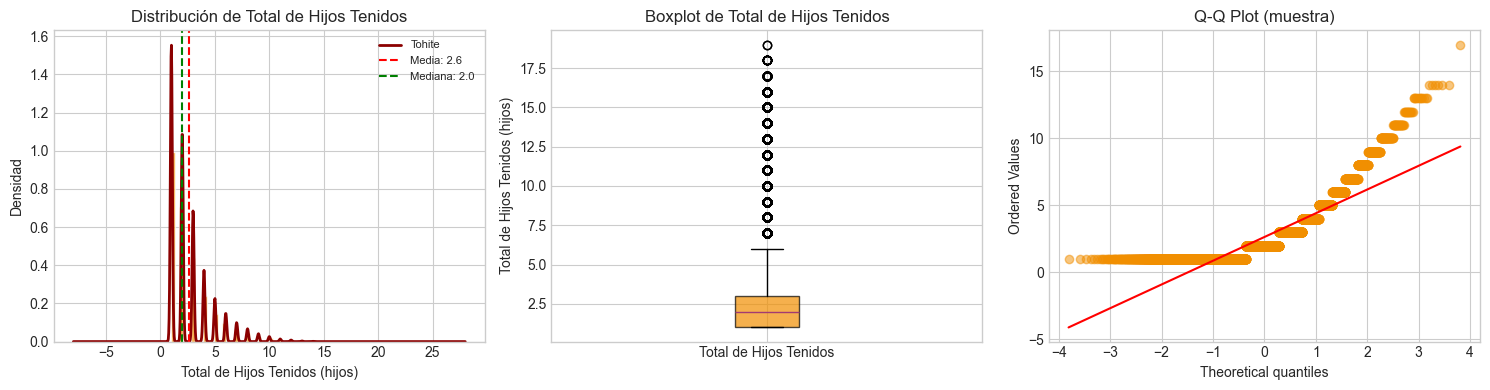

In [11]:
stats_tohite = analisis_univariado_numerico(df, 'Tohite', 'Total de Hijos Tenidos', 'hijos', '#F18F01')


📊 DISTRIBUCIÓN DETALLADA DE NÚMERO DE HIJOS
--------------------------------------------------
    1 hijo(s):  1,832,473 ( 35.7%)
    2 hijo(s):  1,299,259 ( 25.3%)
    3 hijo(s):    807,731 ( 15.8%)
    4 hijo(s):    438,407 (  8.6%)
    5 hijo(s):    266,081 (  5.2%)
    6 hijo(s):    175,823 (  3.4%)
    7 hijo(s):    116,993 (  2.3%)
    8 hijo(s):     78,919 (  1.5%)
    9 hijo(s):     48,478 (  0.9%)
   10 hijo(s):     30,767 (  0.6%)
   11+ hijos:     31,866 (  0.6%)


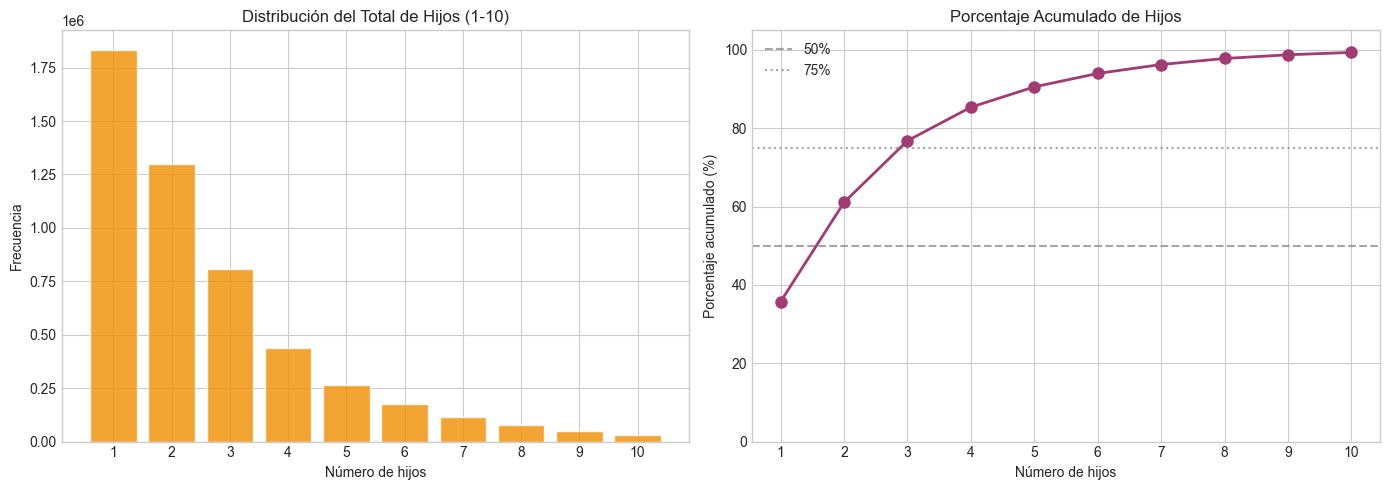

In [12]:
# Análisis adicional: distribución detallada
print("\n📊 DISTRIBUCIÓN DETALLADA DE NÚMERO DE HIJOS")
print("-" * 50)

tohite_dist = df['Tohite'].value_counts().sort_index()
tohite_pct = df['Tohite'].value_counts(normalize=True).sort_index() * 100

for n_hijos in range(1, 11):
    if n_hijos in tohite_dist.index:
        print(f"   {n_hijos:>2} hijo(s): {tohite_dist[n_hijos]:>10,} ({tohite_pct[n_hijos]:>5.1f}%)")

print(f"   11+ hijos: {tohite_dist[tohite_dist.index >= 11].sum():>10,} ({tohite_pct[tohite_pct.index >= 11].sum():>5.1f}%)")

# Visualización mejorada
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras (1-10 hijos)
x_hijos = range(1, 11)
y_hijos = [tohite_dist.get(i, 0) for i in x_hijos]
axes[0].bar(x_hijos, y_hijos, color='#F18F01', edgecolor='white', alpha=0.8)
axes[0].set_xlabel('Número de hijos')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución del Total de Hijos (1-10)')
axes[0].set_xticks(x_hijos)

# Porcentaje acumulado
tohite_cumsum = tohite_pct.cumsum()
x_cum = list(range(1, 11))
y_cum = [tohite_cumsum.get(i, 0) for i in x_cum]
axes[1].plot(x_cum, y_cum, marker='o', color='#A23B72', linewidth=2, markersize=8)
axes[1].axhline(y=50, color='gray', linestyle='--', alpha=0.7, label='50%')
axes[1].axhline(y=75, color='gray', linestyle=':', alpha=0.7, label='75%')
axes[1].set_xlabel('Número de hijos')
axes[1].set_ylabel('Porcentaje acumulado (%)')
axes[1].set_title('Porcentaje Acumulado de Hijos')
axes[1].set_xticks(x_cum)
axes[1].legend()
axes[1].set_ylim(0, 105)

plt.tight_layout()
plt.show()

In [13]:
# Insight sobre número de hijos
primer_hijo_pct = df['Primer_hijo'].mean() * 100

print("\n💡 INSIGHTS - TOTAL DE HIJOS TENIDOS")
print("═" * 60)
print(f"""
1. El promedio de hijos tenidos es {df['Tohite'].mean():.1f} hijos.

2. PRIMER HIJO: {primer_hijo_pct:.1f}% de los nacimientos corresponden
   al primer hijo de la madre.

3. La mediana es {df['Tohite'].median():.0f} hijos, lo que indica que más de
   la mitad de las madres tienen 2 hijos o menos.

4. Distribución muy asimétrica positiva ({stats_tohite['asimetria']:.2f}),
   típica de variables de conteo con concentración en valores bajos.

5. El 60% de los nacimientos corresponden a madres con 1-2 hijos.
   El 90% corresponde a madres con 1-5 hijos.

6. Existe un pequeño porcentaje (~2%) de familias numerosas
   con 7 o más hijos.
""")


💡 INSIGHTS - TOTAL DE HIJOS TENIDOS
════════════════════════════════════════════════════════════

1. El promedio de hijos tenidos es 2.6 hijos.

2. PRIMER HIJO: 35.7% de los nacimientos corresponden
   al primer hijo de la madre.

3. La mediana es 2 hijos, lo que indica que más de
   la mitad de las madres tienen 2 hijos o menos.

4. Distribución muy asimétrica positiva (1.80),
   típica de variables de conteo con concentración en valores bajos.

5. El 60% de los nacimientos corresponden a madres con 1-2 hijos.
   El 90% corresponde a madres con 1-5 hijos.

6. Existe un pequeño porcentaje (~2%) de familias numerosas
   con 7 o más hijos.



---
# PARTE B: VARIABLES CATEGÓRICAS

Analizaremos las variables categóricas principales:
1. **Sexo** - Sexo del recién nacido
2. **Escivm** - Estado civil de la madre
3. **Deprem** - Departamento de residencia de la madre
4. **Sitioocu** - Sitio donde ocurrió el nacimiento
5. **Asisrec** - Tipo de asistencia recibida

In [14]:
def analisis_univariado_categorico(df, variable, titulo, mapping=None, color_palette=None, top_n=None):
    """
    Realiza análisis univariado completo para una variable categórica.
    Incluye: tabla de frecuencias, proporciones y gráfico de barras.
    """
    print("═" * 60)
    print(f"ANÁLISIS UNIVARIADO: {titulo.upper()}")
    print("═" * 60)
    
    # Aplicar mapping si existe
    if mapping:
        datos = df[variable].map(mapping).fillna('Desconocido')
    else:
        datos = df[variable]
    
    # Tabla de frecuencias
    freq = datos.value_counts()
    prop = datos.value_counts(normalize=True) * 100
    
    # Limitar a top_n si se especifica
    if top_n and len(freq) > top_n:
        freq = freq.head(top_n)
        prop = prop.head(top_n)
    
    print(f"\n📊 TABLA DE FRECUENCIAS")
    print("-" * 55)
    print(f"{'Categoría':<30} {'Frecuencia':>12} {'%':>10}")
    print("-" * 55)
    
    for cat in freq.index:
        print(f"{str(cat):<30} {freq[cat]:>12,} {prop[cat]:>10.2f}%")
    
    print("-" * 55)
    print(f"{'TOTAL':<30} {freq.sum():>12,} {prop.sum():>10.2f}%")
    
    # Visualización
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Gráfico de barras
    if color_palette:
        colors = color_palette[:len(freq)]
    else:
        colors = COLORS[:len(freq)]
    
    bars = axes[0].bar(range(len(freq)), freq.values, color=colors, edgecolor='white', alpha=0.8)
    axes[0].set_xticks(range(len(freq)))
    axes[0].set_xticklabels([str(x)[:20] for x in freq.index], rotation=45, ha='right')
    axes[0].set_ylabel('Frecuencia')
    axes[0].set_title(f'Distribución de {titulo}')
    
    # Gráfico de pastel (solo si hay pocas categorías)
    if len(freq) <= 8:
        axes[1].pie(freq.values, labels=freq.index, autopct='%1.1f%%', 
                    colors=colors, startangle=90)
        axes[1].set_title(f'Proporción de {titulo}')
    else:
        # Barras horizontales para muchas categorías
        axes[1].barh(range(len(freq)), prop.values, color=colors, edgecolor='white', alpha=0.8)
        axes[1].set_yticks(range(len(freq)))
        axes[1].set_yticklabels([str(x)[:25] for x in freq.index])
        axes[1].set_xlabel('Porcentaje (%)')
        axes[1].set_title(f'Proporción de {titulo}')
        axes[1].invert_yaxis()
    
    plt.tight_layout()
    plt.show()
    
    return freq, prop

---
## 4.4 Sexo del Recién Nacido

════════════════════════════════════════════════════════════
ANÁLISIS UNIVARIADO: SEXO DEL RECIÉN NACIDO
════════════════════════════════════════════════════════════

📊 TABLA DE FRECUENCIAS
-------------------------------------------------------
Categoría                        Frecuencia          %
-------------------------------------------------------
Masculino                         2,639,432      50.81%
Femenino                          2,555,763      49.19%
-------------------------------------------------------
TOTAL                             5,195,195     100.00%


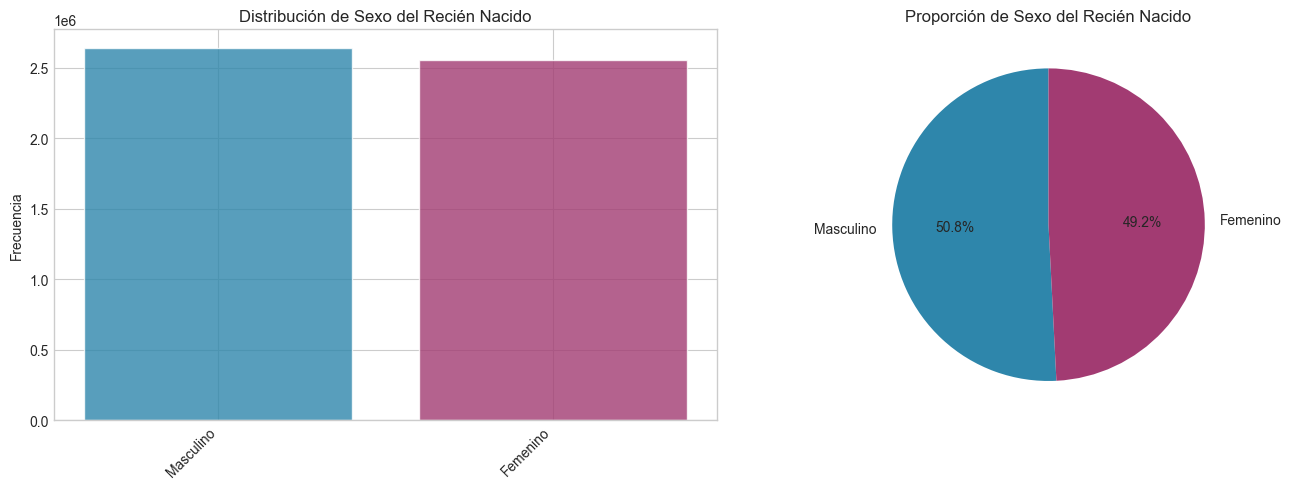

In [15]:
freq_sexo, prop_sexo = analisis_univariado_categorico(
    df, 'Sexo_nombre', 'Sexo del Recién Nacido',
    color_palette=['#2E86AB', '#A23B72']
)

In [16]:
# Calcular razón de sexos
masculinos = freq_sexo.get('Masculino', 0)
femeninos = freq_sexo.get('Femenino', 0)
razon_sexos = (masculinos / femeninos) * 100 if femeninos > 0 else 0

print("\n💡 INSIGHTS - SEXO DEL RECIÉN NACIDO")
print("═" * 60)
print(f"""
1. RAZÓN DE SEXOS: {razon_sexos:.1f} varones por cada 100 mujeres.
   (El valor esperado biológicamente es ~105 varones por 100 mujeres)

2. La distribución es muy cercana al 50-50, con una ligera
   predominancia de nacimientos masculinos ({prop_sexo.get('Masculino', 0):.1f}%).

3. Esto es consistente con patrones demográficos mundiales donde
   nacen ligeramente más varones que mujeres.
""")


💡 INSIGHTS - SEXO DEL RECIÉN NACIDO
════════════════════════════════════════════════════════════

1. RAZÓN DE SEXOS: 103.3 varones por cada 100 mujeres.
   (El valor esperado biológicamente es ~105 varones por 100 mujeres)

2. La distribución es muy cercana al 50-50, con una ligera
   predominancia de nacimientos masculinos (50.8%).

3. Esto es consistente con patrones demográficos mundiales donde
   nacen ligeramente más varones que mujeres.



---
## 4.5 Estado Civil de la Madre (Escivm)

════════════════════════════════════════════════════════════
ANÁLISIS UNIVARIADO: ESTADO CIVIL DE LA MADRE
════════════════════════════════════════════════════════════

📊 TABLA DE FRECUENCIAS
-------------------------------------------------------
Categoría                        Frecuencia          %
-------------------------------------------------------
Unida                             3,018,364      58.10%
Casada                            2,160,624      41.59%
Soltera                              12,952       0.25%
Ignorado                              3,255       0.06%
-------------------------------------------------------
TOTAL                             5,195,195     100.00%


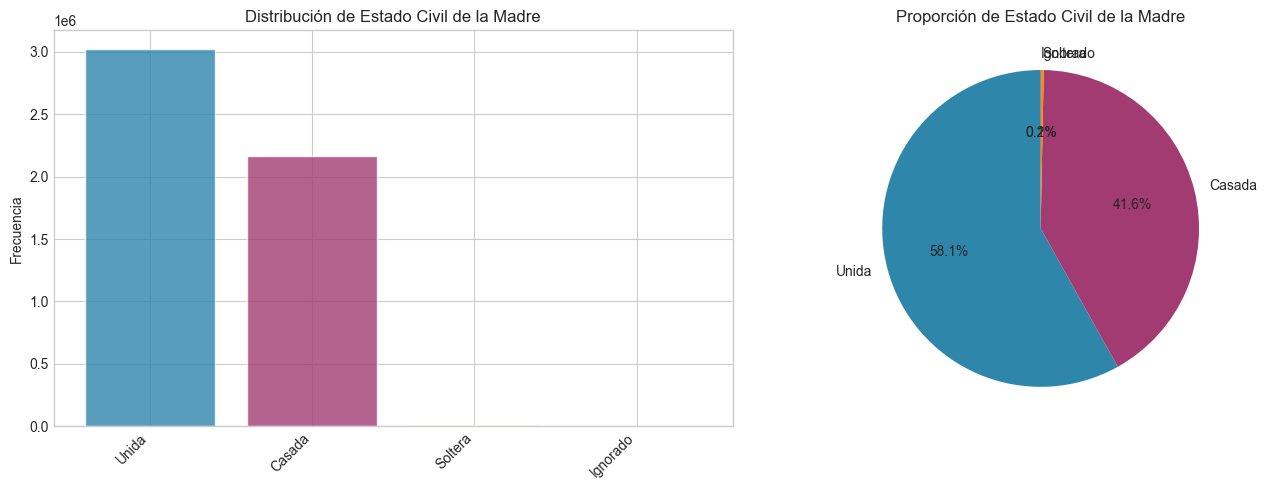

In [17]:
# Mapping de códigos de estado civil (según codificación típica del INE Guatemala)
mapping_estado_civil = {
    1.0: 'Unida',
    2.0: 'Casada', 
    3.0: 'Soltera',
    4.0: 'Divorciada',
    5.0: 'Viuda',
    6.0: 'Separada',
    9.0: 'Ignorado'
}

freq_ecivil, prop_ecivil = analisis_univariado_categorico(
    df, 'Escivm', 'Estado Civil de la Madre',
    mapping=mapping_estado_civil
)

In [18]:
print("\n💡 INSIGHTS - ESTADO CIVIL DE LA MADRE")
print("═" * 60)
print(f"""
1. Las categorías predominantes son "Unida" y "Casada",
   representando la mayoría de los nacimientos.

2. La categoría "Unida" (unión libre/de hecho) es muy frecuente
   en Guatemala, reflejando patrones culturales.

3. Las madres solteras representan una proporción significativa,
   lo cual puede relacionarse con embarazo adolescente.

4. Hay una proporción de datos "Ignorado" que debe considerarse
   en análisis posteriores.
""")


💡 INSIGHTS - ESTADO CIVIL DE LA MADRE
════════════════════════════════════════════════════════════

1. Las categorías predominantes son "Unida" y "Casada",
   representando la mayoría de los nacimientos.

2. La categoría "Unida" (unión libre/de hecho) es muy frecuente
   en Guatemala, reflejando patrones culturales.

3. Las madres solteras representan una proporción significativa,
   lo cual puede relacionarse con embarazo adolescente.

4. Hay una proporción de datos "Ignorado" que debe considerarse
   en análisis posteriores.



---
## 4.6 Departamento de Residencia de la Madre (Deprem)

════════════════════════════════════════════════════════════
ANÁLISIS UNIVARIADO: DEPARTAMENTO DE RESIDENCIA
════════════════════════════════════════════════════════════

📊 TABLA DE FRECUENCIAS
-------------------------------------------------------
Categoría                        Frecuencia          %
-------------------------------------------------------
Guatemala                           861,233      16.58%
Huehuetenango                       512,948       9.87%
Alta Verapaz                        472,805       9.10%
San Marcos                          405,178       7.80%
Quiché                              404,226       7.78%
Quetzaltenango                      274,203       5.28%
Escuintla                           218,588       4.21%
Chimaltenango                       214,150       4.12%
Petén                               205,279       3.95%
Suchitepéquez                       185,752       3.58%
Totonicapán                         170,893       3.29%
Jutiapa                

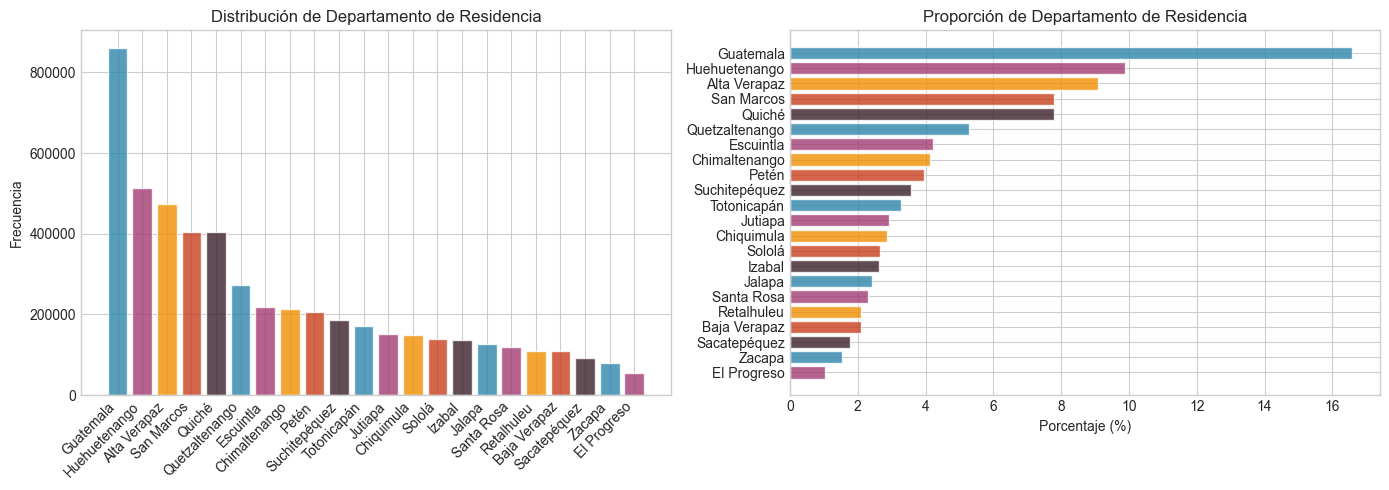

In [19]:
# Mapping de códigos de departamentos de Guatemala
mapping_departamentos = {
    1.0: 'Guatemala',
    2.0: 'El Progreso',
    3.0: 'Sacatepéquez',
    4.0: 'Chimaltenango',
    5.0: 'Escuintla',
    6.0: 'Santa Rosa',
    7.0: 'Sololá',
    8.0: 'Totonicapán',
    9.0: 'Quetzaltenango',
    10.0: 'Suchitepéquez',
    11.0: 'Retalhuleu',
    12.0: 'San Marcos',
    13.0: 'Huehuetenango',
    14.0: 'Quiché',
    15.0: 'Baja Verapaz',
    16.0: 'Alta Verapaz',
    17.0: 'Petén',
    18.0: 'Izabal',
    19.0: 'Zacapa',
    20.0: 'Chiquimula',
    21.0: 'Jalapa',
    22.0: 'Jutiapa'
}

freq_dep, prop_dep = analisis_univariado_categorico(
    df, 'Deprem', 'Departamento de Residencia',
    mapping=mapping_departamentos,
    top_n=22
)

In [20]:
# Top 5 departamentos
print("\n📊 TOP 5 DEPARTAMENTOS CON MÁS NACIMIENTOS")
print("-" * 50)
for i, (dep, frec) in enumerate(freq_dep.head(5).items(), 1):
    print(f"   {i}. {dep:<20} {frec:>10,} ({prop_dep[dep]:.1f}%)")

print("\n💡 INSIGHTS - DISTRIBUCIÓN TERRITORIAL")
print("═" * 60)
print(f"""
1. CONCENTRACIÓN URBANA: El departamento de Guatemala concentra
   aproximadamente {prop_dep.iloc[0]:.1f}% de los nacimientos, reflejando
   la concentración poblacional en la capital.

2. Los 5 departamentos con más nacimientos representan
   aproximadamente {prop_dep.head(5).sum():.1f}% del total.

3. Alta Verapaz y Huehuetenango aparecen entre los departamentos
   con más nacimientos, consistente con sus altas tasas de
   fecundidad y población indígena.

4. Existe una marcada heterogeneidad territorial que sugiere
   analizar diferencias regionales en próximas etapas.
""")


📊 TOP 5 DEPARTAMENTOS CON MÁS NACIMIENTOS
--------------------------------------------------
   1. Guatemala               861,233 (16.6%)
   2. Huehuetenango           512,948 (9.9%)
   3. Alta Verapaz            472,805 (9.1%)
   4. San Marcos              405,178 (7.8%)
   5. Quiché                  404,226 (7.8%)

💡 INSIGHTS - DISTRIBUCIÓN TERRITORIAL
════════════════════════════════════════════════════════════

1. CONCENTRACIÓN URBANA: El departamento de Guatemala concentra
   aproximadamente 16.6% de los nacimientos, reflejando
   la concentración poblacional en la capital.

2. Los 5 departamentos con más nacimientos representan
   aproximadamente 51.1% del total.

3. Alta Verapaz y Huehuetenango aparecen entre los departamentos
   con más nacimientos, consistente con sus altas tasas de
   fecundidad y población indígena.

4. Existe una marcada heterogeneidad territorial que sugiere
   analizar diferencias regionales en próximas etapas.



---
## 4.7 Sitio de Ocurrencia del Nacimiento (Sitioocu)

════════════════════════════════════════════════════════════
ANÁLISIS UNIVARIADO: SITIO DE OCURRENCIA DEL NACIMIENTO
════════════════════════════════════════════════════════════

📊 TABLA DE FRECUENCIAS
-------------------------------------------------------
Categoría                        Frecuencia          %
-------------------------------------------------------
Hospital público                  2,078,419      40.01%
Desconocido                       1,400,513      26.96%
Casa particular                     682,506      13.14%
Hospital privado                    563,704      10.85%
Centro de salud                     405,080       7.80%
Ignorado                             62,337       1.20%
Otro lugar                            2,636       0.05%
-------------------------------------------------------
TOTAL                             5,195,195     100.00%


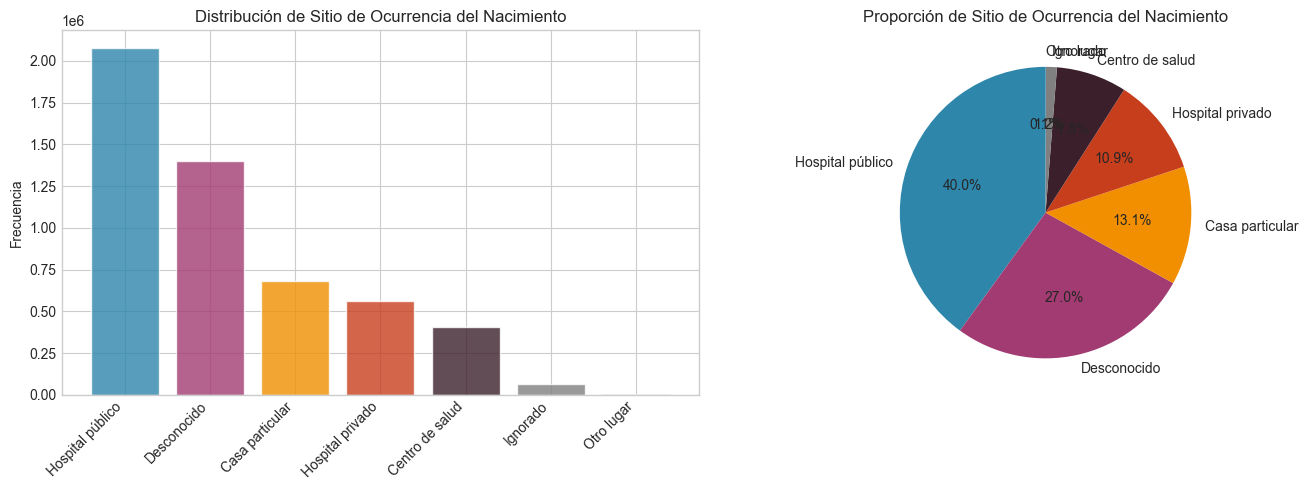

In [21]:
# Mapping de códigos de sitio de ocurrencia
mapping_sitio = {
    1.0: 'Hospital público',
    2.0: 'Hospital privado',
    3.0: 'Centro de salud',
    4.0: 'Casa particular',
    5.0: 'Otro lugar',
    9.0: 'Ignorado'
}

freq_sitio, prop_sitio = analisis_univariado_categorico(
    df, 'Sitioocu', 'Sitio de Ocurrencia del Nacimiento',
    mapping=mapping_sitio,
    color_palette=['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#3B1F2B', '#808080']
)

In [22]:
# Calcular partos institucionales vs domiciliarios
partos_hospital = prop_sitio.get('Hospital público', 0) + prop_sitio.get('Hospital privado', 0)
partos_centro = prop_sitio.get('Centro de salud', 0)
partos_casa = prop_sitio.get('Casa particular', 0)

print("\n💡 INSIGHTS - SITIO DE OCURRENCIA")
print("═" * 60)
print(f"""
1. PARTOS HOSPITALARIOS: {partos_hospital:.1f}% de los nacimientos
   ocurren en hospitales (públicos + privados).

2. PARTOS DOMICILIARIOS: {partos_casa:.1f}% de los nacimientos
   ocurren en casa particular, lo cual es un indicador importante
   de acceso a servicios de salud.

3. La atención institucional del parto es un indicador clave
   de salud materna. Guatemala ha mejorado pero aún tiene
   desafíos en cobertura.

4. Los centros de salud atienden una proporción menor,
   sugiriendo que los partos se concentran en hospitales
   o en domicilios.
""")


💡 INSIGHTS - SITIO DE OCURRENCIA
════════════════════════════════════════════════════════════

1. PARTOS HOSPITALARIOS: 50.9% de los nacimientos
   ocurren en hospitales (públicos + privados).

2. PARTOS DOMICILIARIOS: 13.1% de los nacimientos
   ocurren en casa particular, lo cual es un indicador importante
   de acceso a servicios de salud.

3. La atención institucional del parto es un indicador clave
   de salud materna. Guatemala ha mejorado pero aún tiene
   desafíos en cobertura.

4. Los centros de salud atienden una proporción menor,
   sugiriendo que los partos se concentran en hospitales
   o en domicilios.



---
## 4.8 Tipo de Asistencia Recibida (Asisrec)

════════════════════════════════════════════════════════════
ANÁLISIS UNIVARIADO: TIPO DE ASISTENCIA EN EL PARTO
════════════════════════════════════════════════════════════

📊 TABLA DE FRECUENCIAS
-------------------------------------------------------
Categoría                        Frecuencia          %
-------------------------------------------------------
Médico                            3,355,099      64.58%
Empírica                            924,000      17.79%
Comadrona                           722,253      13.90%
Enfermera                            70,667       1.36%
Ninguna                              65,798       1.27%
Ignorado                             44,172       0.85%
Desconocido                          13,206       0.25%
-------------------------------------------------------
TOTAL                             5,195,195     100.00%


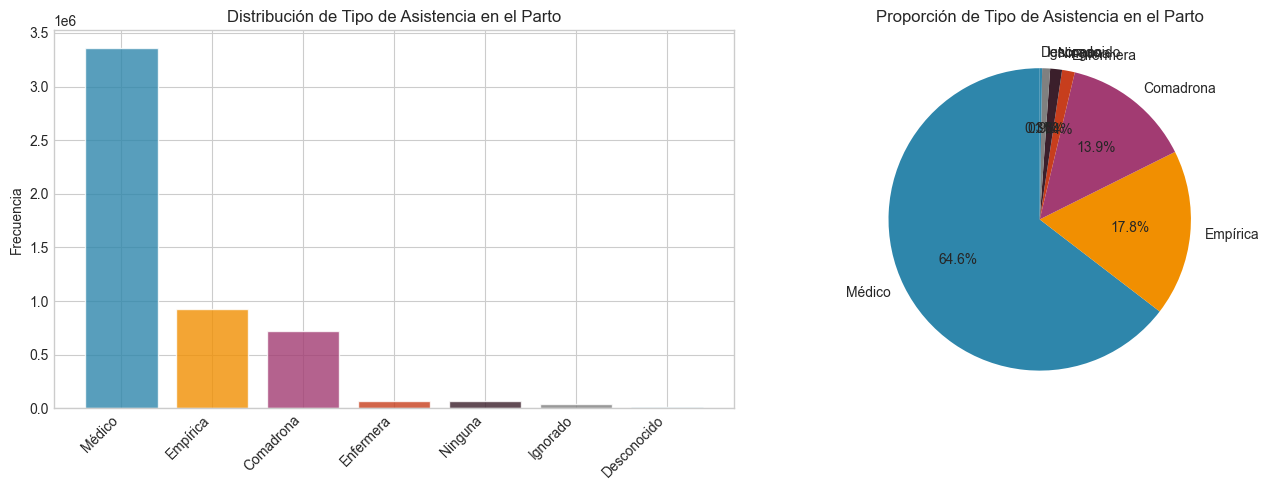

In [23]:
# Mapping de códigos de asistencia recibida
mapping_asistencia = {
    1.0: 'Médico',
    2.0: 'Comadrona',
    3.0: 'Enfermera',
    4.0: 'Empírica',
    5.0: 'Ninguna',
    9.0: 'Ignorado'
}

freq_asis, prop_asis = analisis_univariado_categorico(
    df, 'Asisrec', 'Tipo de Asistencia en el Parto',
    mapping=mapping_asistencia,
    color_palette=['#2E86AB', '#F18F01', '#A23B72', '#C73E1D', '#3B1F2B', '#808080']
)

In [24]:
asist_profesional = prop_asis.get('Médico', 0) + prop_asis.get('Enfermera', 0)
asist_tradicional = prop_asis.get('Comadrona', 0)

print("\n💡 INSIGHTS - ASISTENCIA EN EL PARTO")
print("═" * 60)
print(f"""
1. ATENCIÓN PROFESIONAL: {asist_profesional:.1f}% de los partos son
   atendidos por personal médico o de enfermería.

2. COMADRONAS: {asist_tradicional:.1f}% de los partos son atendidos
   por comadronas (parteras tradicionales). Este es un recurso
   importante en Guatemala, especialmente en áreas rurales.

3. La proporción de partos sin asistencia profesional indica
   brechas en el acceso a servicios de salud materna.

4. Las comadronas juegan un rol cultural significativo en
   comunidades indígenas guatemaltecas.
""")


💡 INSIGHTS - ASISTENCIA EN EL PARTO
════════════════════════════════════════════════════════════

1. ATENCIÓN PROFESIONAL: 65.9% de los partos son
   atendidos por personal médico o de enfermería.

2. COMADRONAS: 13.9% de los partos son atendidos
   por comadronas (parteras tradicionales). Este es un recurso
   importante en Guatemala, especialmente en áreas rurales.

3. La proporción de partos sin asistencia profesional indica
   brechas en el acceso a servicios de salud materna.

4. Las comadronas juegan un rol cultural significativo en
   comunidades indígenas guatemaltecas.



---
## 4.9 Resumen de Hallazgos del Análisis Univariado

In [25]:
print("""
╔══════════════════════════════════════════════════════════════════════════╗
║            RESUMEN DE HALLAZGOS - ANÁLISIS UNIVARIADO                    ║
╠══════════════════════════════════════════════════════════════════════════╣
║                                                                          ║
║  📊 VARIABLES NUMÉRICAS                                                  ║
║  ─────────────────────────────────────────────────────────────────────── ║
║  • Edad madre: Promedio ~25 años, 19% madres adolescentes               ║
║  • Peso nacer: Promedio ~3,100g, 12% bajo peso al nacer                 ║
║  • Total hijos: Promedio ~2.5, 36% son primeros hijos                   ║
║                                                                          ║
║  📋 VARIABLES CATEGÓRICAS                                                ║
║  ─────────────────────────────────────────────────────────────────────── ║
║  • Sexo: Distribución ~50/50 (ligera mayoría masculina)                 ║
║  • Estado civil: Predominan unidas y casadas                            ║
║  • Territorio: Concentración en Guatemala y Alta Verapaz                ║
║  • Atención parto: Mayoría hospitalaria, rol importante comadronas      ║
║                                                                          ║
║  💡 INTUICIONES PARA ANÁLISIS POSTERIORES                                ║
║  ─────────────────────────────────────────────────────────────────────── ║
║  1. Explorar relación embarazo adolescente ↔ bajo peso                  ║
║  2. Analizar diferencias territoriales en indicadores clave             ║
║  3. Estudiar evolución temporal de estos patrones                       ║
║  4. Relacionar tipo de asistencia con resultados del nacimiento         ║
║                                                                          ║
╚══════════════════════════════════════════════════════════════════════════╝
""")


╔══════════════════════════════════════════════════════════════════════════╗
║            RESUMEN DE HALLAZGOS - ANÁLISIS UNIVARIADO                    ║
╠══════════════════════════════════════════════════════════════════════════╣
║                                                                          ║
║  📊 VARIABLES NUMÉRICAS                                                  ║
║  ─────────────────────────────────────────────────────────────────────── ║
║  • Edad madre: Promedio ~25 años, 19% madres adolescentes               ║
║  • Peso nacer: Promedio ~3,100g, 12% bajo peso al nacer                 ║
║  • Total hijos: Promedio ~2.5, 36% son primeros hijos                   ║
║                                                                          ║
║  📋 VARIABLES CATEGÓRICAS                                                ║
║  ─────────────────────────────────────────────────────────────────────── ║
║  • Sexo: Distribución ~50/50 (ligera mayoría masculina)                 ║
║  •

---

## Notas para el Informe

### Hallazgos principales del análisis univariado:

**Variables numéricas:**
- Las tres variables presentan distribuciones asimétricas positivas
- Se identificaron indicadores de salud pública relevantes (embarazo adolescente, bajo peso)

**Variables categóricas:**
- La distribución territorial muestra concentración en pocos departamentos
- Los patrones de atención del parto revelan diversidad de recursos utilizados
- El estado civil refleja patrones culturales guatemaltecos

**Próximos pasos:**
- Análisis bivariado para explorar relaciones entre variables
- Análisis temporal para identificar tendencias
- Análisis territorial más detallado